In [1]:
# Die Chance für faire und unfaire Games sollte 50/50 sein. Allerdings wurden bei einer Samplesize von 38 Games 11 Vorteilhafte und 27 Unvorteilhafte gemesssen.
# Nun stellt sich die Frage, ob diese Abweichung nur dem Zufall zuzuschreiben ist, oder das System mit hoher
# Wahrscheinlichkeit den Spieler benachteiligt.

from scipy import stats
from scipy.stats import binomtest

pval = []
sum_games = []

vorteilhafte_games_myself = 11
unvorteilhafte_games_myself = 27
expecte_ratio = 0.50

samplesize = vorteilhafte_games_myself + unvorteilhafte_games_myself

ratio = unvorteilhafte_games_myself / samplesize


for i in range(1,50):
    games = i
    fair = games * expecte_ratio
    sum_games.append(games)
    pval.append(stats.binom_test(int(fair), n=games, p=ratio, alternative = "two-sided"))

pval1 = stats.binom_test(int(samplesize*0.50), n=samplesize, p=ratio, alternative = "two-sided")
    
print("pval bei samplesize " +  str(samplesize) + " und Stichprobe " + str(unvorteilhafte_games_myself) + " und expected Ratio " + str(expecte_ratio) +  ": " + str(pval1))

result = binomtest(19, n=38, p=0.50, alternative ="two-sided")

print(result)
print(result.proportion_ci(confidence_level=0.95))


print(round(38 *0.3337890061130965 ))
print(round(38 *0.6662109938869034 ))



pval bei samplesize 38 und Stichprobe 27 und expected Ratio 0.5: 0.006598502130422207
BinomTestResult(k=19, n=38, alternative='two-sided', proportion_estimate=0.5, pvalue=1.0)
ConfidenceInterval(low=0.3337890061130965, high=0.6662109938869034)
13
25


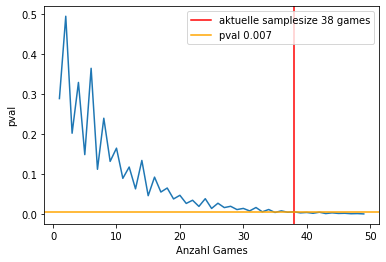

In [2]:
from matplotlib import pyplot as plt

plt.plot(sum_games, pval)
plt.axvline(samplesize, color="r", label="aktuelle samplesize " + str(samplesize) + " games")
#plt.axvline(129, color="g", label="samplesize für impact Bed: gleiche WR")
plt.axhline(pval1, color="orange", label="pval " + str(round(pval1,3)))
plt.xlabel("Anzahl Games")
plt.legend()
plt.ylabel("pval")
plt.show()

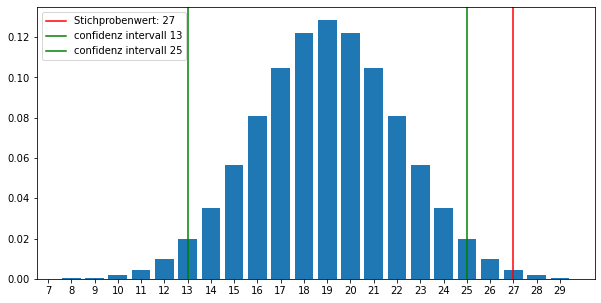

In [3]:
from scipy import stats
from scipy.stats import binom

n = samplesize
p = 0.50
# defining list of r values
r_values = list(range(n + 1))
# list of pmf values
dist = [binom.pmf(r, n, p) for r in r_values ]
# plotting the graph 
plt.rcParams["figure.figsize"]=10,5

fig, ax = plt.subplots()
plt.bar(r_values[8:30], dist[8:30])
plt.axvline(unvorteilhafte_games_myself, color="r", label="Stichprobenwert: " + str(unvorteilhafte_games_myself))
plt.axvline(13, color="g", label="confidenz intervall " + str(13))
plt.axvline(25, color="g", label="confidenz intervall " + str(25))
plt.legend()
ax.set_xticks(range(7,30,1))
plt.show()

In [ ]:
#asdasd
#asdasdaasdasdasdasddasdasdasdasd